In [ ]:
#Data Preparation:

In [ ]:
import pandas as pd

In [ ]:
FraudData = pd.read_csv('Synthetic_Financial_datasets_log.csv')

In [ ]:
#Display the first few rows to familiarize yourself with the structure
#and contents.
FraudData.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [29]:
#List the columns and explain the importance of each in the context
#of fraud detection.
FraudData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97224 entries, 0 to 97223
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            97224 non-null  int64  
 1   type            97224 non-null  object 
 2   amount          97224 non-null  float64
 3   nameOrig        97224 non-null  object 
 4   oldbalanceOrg   97224 non-null  float64
 5   newbalanceOrig  97224 non-null  float64
 6   nameDest        97224 non-null  object 
 7   oldbalanceDest  97224 non-null  float64
 8   newbalanceDest  97224 non-null  float64
 9   isFraud         97224 non-null  float64
 10  isFlaggedFraud  97224 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 8.3+ MB


In [ ]:
#Data Cleaning:

In [ ]:
#Checking missing or inconsistent values.
FraudData.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,1
isFraud,1


In [ ]:
FraudData[FraudData.isnull().any(axis=1)]

#Insights:
#Only one row with missing values.
#The row has many nulls, not just one.
#dataset is large, so dropping one row has no significant impact.

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
97224,10,PAYMENT,6733.59,C708911726,0.0,0.0,M2034482538,0.0,NaN,NaN,NaN


In [ ]:
FraudData.dropna(inplace=True)

In [ ]:
FraudData[FraudData.isnull().any(axis=1)]
# No null values.

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
#Remove or handle columns that are irrelevant for fraud detection.
#Justify your choice

#Columns like nameOrig,nameDest are not helpful and used just as an ID for each account.
#Hence, we will remove them:
#FraudData.drop(columns={'nameOrig','nameDest'},inplace=True)

In [ ]:
FraudData

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
97219,10,PAYMENT,10811.91,C504389296,1009.0,0.00,M1318927100,0.0,0.0,0.0,0.0
97220,10,PAYMENT,17011.46,C1283088834,0.0,0.00,M485693121,0.0,0.0,0.0,0.0
97221,10,PAYMENT,1680.50,C671281,0.0,0.00,M661110294,0.0,0.0,0.0,0.0
97222,10,PAYMENT,26450.83,C948744009,0.0,0.00,M1020130183,0.0,0.0,0.0,0.0


In [ ]:
# Exploratory Analysis:

In [ ]:
#Calculate the total number of transactions and categorize them by
#type.
TotalTransByType = FraudData.groupby('type')['amount'].count()
TotalTransByType

,amount
type,
CASH_IN,19561
CASH_OUT,29839
DEBIT,976
PAYMENT,38477
TRANSFER,8371


In [ ]:
#Identify the percentage of fraudulent transactions and compare
#them across transaction types.
fraudByType = FraudData[FraudData['isFraud']==1].groupby('type').size()
fraudByType

,0
type,
CASH_OUT,58
TRANSFER,56


In [31]:
#Identify the percentage of fraudulent transactions and compare
#them across transaction types.
fraudByType = FraudData[FraudData['isFraud']==1].groupby('type').size()
#fraudByType
((fraudByType / TotalTransByType )*100).fillna(0)

,0
type,
CASH_IN,0.000000
CASH_OUT,0.194376
DEBIT,0.000000
PAYMENT,0.000000
TRANSFER,0.668976


In [ ]:
#Examine the distribution of transaction amounts (mean, median,
#standard deviation) for both fraudulent and non-fraudulent
#transactions.
FraudData.groupby('isFraud')['amount'].agg(['mean','median','std'])

,mean,median,std
isFraud,,,
0.0,171989.264474,52096.285,3.378269e+05
1.0,542248.117895,35063.630,1.548583e+06


In [ ]:
FraudData.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,97224.000000,9.722400e+04,9.722400e+04,9.722400e+04,9.722400e+04,9.722400e+04,97224.000000,97224.0
mean,8.456801,1.724234e+05,8.793240e+05,8.956240e+05,8.792774e+05,1.182315e+06,0.001173,0.0
std,1.833483,3.419664e+05,2.689877e+06,2.727838e+06,2.403365e+06,2.802840e+06,0.034223,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.893135e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.208212e+04,1.994750e+04,0.000000e+00,2.080950e+04,4.894480e+04,0.000000,0.0
75%,10.000000,2.103614e+05,1.863529e+05,2.107077e+05,5.853541e+05,1.051531e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.397234e+07,1.000000,0.0


In [ ]:
# Real-Life Fraud Detection Analysis:

In [ ]:
#Detecting Suspicious Patterns:

#Identify and flag transactions exceeding the legal limit (amount >
#200,000) as potentially fraudulent (isFlaggedFraud).

FraudData['isFlaggedFraud'] = FraudData['amount'] > 200000

In [ ]:
FraudData

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,False
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
97219,10,PAYMENT,10811.91,C504389296,1009.0,0.00,M1318927100,0.0,0.0,0.0,False
97220,10,PAYMENT,17011.46,C1283088834,0.0,0.00,M485693121,0.0,0.0,0.0,False
97221,10,PAYMENT,1680.50,C671281,0.0,0.00,M661110294,0.0,0.0,0.0,False
97222,10,PAYMENT,26450.83,C948744009,0.0,0.00,M1020130183,0.0,0.0,0.0,False


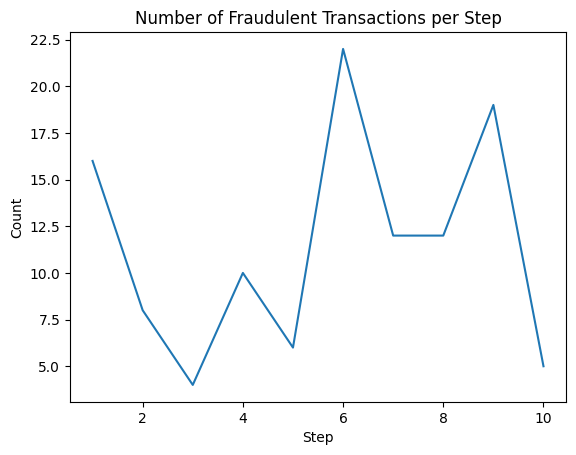

In [ ]:
#Find patterns in fraud-related transactions, such as the time step,
#type, or transaction amount.

import matplotlib.pyplot as plt
#Step:
fraud_only = FraudData[FraudData['isFraud'] == 1]
fraud_only.groupby('step').size().plot()
plt.title("Number of Fraudulent Transactions per Step")
plt.xlabel("Step")
plt.ylabel("Count")
plt.show()

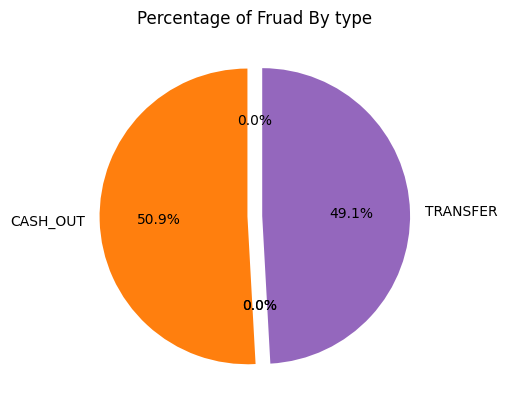

In [ ]:
fraud_by_type = FraudData.groupby('type')['isFraud'].sum()

# To make other labels appear:
#fraud_by_type = fraud_by_type.replace(0, 0.0001)

fraud_by_type.plot(kind='pie',autopct='%1.1f%%',
                   explode = [0.05,0.05,0,0,0.05],
                   labels = fraud_by_type.index,
                    startangle=90)
plt.title('Percentage of Fruad By type')
plt.ylabel(' ')
plt.show()

In [ ]:
#Group Analysis:

#Group transactions by type and identify which types have the
#highest volume and value.

FraudData.groupby('type').size()

,0
type,
CASH_IN,19561
CASH_OUT,29839
DEBIT,976
PAYMENT,38477
TRANSFER,8371


In [ ]:
FraudData.groupby('type')['amount'].max()

,amount
type,
CASH_IN,1289407.91
CASH_OUT,10000000.00
DEBIT,130835.31
PAYMENT,83428.95
TRANSFER,10000000.00


In [32]:
#Examine whether certain customers (nameOrig or nameDest) are
#repeatedly involved in flagged or fraudulent transactions.

fraud_senders = FraudData[FraudData['isFraud'] == 1]['nameOrig'].value_counts()
fraud_senders[fraud_senders > 1]


,count
nameOrig,


In [33]:
fraud_receivers = FraudData[FraudData['isFraud'] == 1]['nameDest'].value_counts()
fraud_receivers[fraud_receivers > 1]

,count
nameDest,
C410033330,2
